In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
data = pd.read_csv('spam_dataset.csv')
data


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [65]:
data.dropna(inplace=True)
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [66]:

"""data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

data.head()"""

"data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})\n\ndata.head()"

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


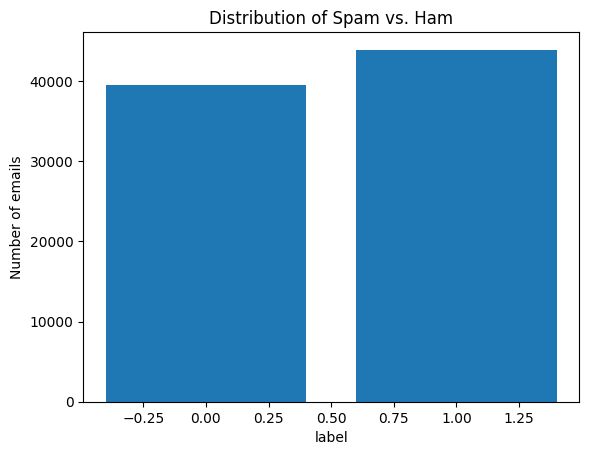

In [68]:
spam_counts = data['label'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('label')
plt.ylabel('Number of emails')
plt.show()

In [69]:
X = data['text']  
y = data['label']  

In [70]:
X = [str(Message) for Message in X]

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200)


In [71]:
# Convert label labels to binary
data['label'] = data['label'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = data['label'].values

In [72]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 16)           16000     
                                                                 
 lstm_14 (LSTM)              (None, 200, 64)           20736     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,185
Trainable params: 49,185
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1669/1669 [==============================] - 104s 60ms/step - loss: 0.0313 - accuracy: 0.9996 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 2/5
1669/1669 [==============================] - 96s 57ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/5
1669/1669 [==============================] - 95s 57ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/5
1669/1669 [==============================] - 96s 57ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.4557e-04 - val_accuracy: 1.0000
Epoch 5/5
1669/1669 [==============================] - 96s 58ms/step - loss: 8.3163e-04 - accuracy: 1.0000 - val_loss: 7.3423e-04 - val_accuracy: 1.0000


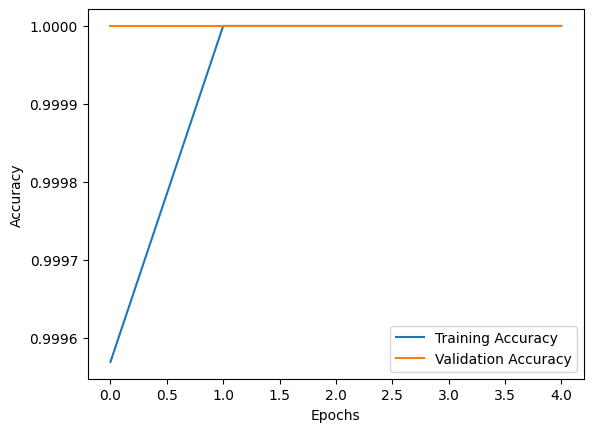

In [83]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
accuracy

522/522 [==============================] - 13s 25ms/step


1.0